In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context("notebook")
sns.set_style("whitegrid")

# Carregando dados

Carregando [dados](https://dadosabertos.tse.jus.br/dataset/resultados-2022) disponibilizados pela plataforma Dados Abertos do Tribunal Superior Eleitoral. Os dados correspondem a uma série temporal contendo a evolução a apuração no Brasil, desde o ínicio da apuração até seu fim.

In [3]:
PATH_TO_DATA = "/run/media/kenzo/DATA/kenzo/eleicoes2022/Historico_Totalizacao_Presidente_BR_2T_2022/Historico_Totalizacao_Presidente_BR_2T_2022.csv"

In [4]:
df = pd.read_csv(PATH_TO_DATA, sep=";")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0    CD_PLEITO                                     5286 non-null   int64 
 1   CD_ELEICAO                                     5286 non-null   int64 
 2     CD_CARGO                                     5286 non-null   int64 
 3   SG_UE_UF                                       5286 non-null   object
 4   DT_TOTALIZACAO                                 5286 non-null   object
 5   QT_SECOES_TOTAL                                5286 non-null   int64 
 6   QT_APTOS_TOTAL                                 5286 non-null   int64 
 7   QT_SECOES_TOT                                  5286 non-null   int64 
 8   QT_SECOES_TOT_ACUMULADO                        5286 non-null   int64 
 9   PE_SECOES_TOT_ACUMULADO                        5286 non-null   

In [6]:
# Padronizando nomes de colunas
df.columns = [col.strip() for col in df.columns]

In [7]:
# Eliminando espaços de colunas com dados textuais
df["SG_UE_UF"] = df["SG_UE_UF"].str.strip()

In [8]:
# Convertendo tipos de dados
df["LULA_PE_VOTOS_TOT_ACUMULADO"] = pd.to_numeric(df["LULA_PE_VOTOS_TOT_ACUMULADO"].str.strip().str.replace(",", "."), downcast="float")
df["JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"] = pd.to_numeric(df["JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO"].str.strip().str.replace(",", "."), downcast="float")

In [9]:
# Convertendo timesteps
df["DT_TOTALIZACAO"] = pd.to_datetime(df["DT_TOTALIZACAO"])

# Extraindo total de votos por cadidato

In [10]:
df.tail()

,CD_PLEITO,CD_ELEICAO,CD_CARGO,SG_UE_UF,DT_TOTALIZACAO,QT_SECOES_TOTAL,QT_APTOS_TOTAL,QT_SECOES_TOT,QT_SECOES_TOT_ACUMULADO,PE_SECOES_TOT_ACUMULADO,...,LULA_PE_VOTOS_TOT_ACUMULADO,JAIR_BOLSONARO_QT_VOTOS_TOT,JAIR_BOLSONARO_QT_VOTOS_TOT_ACUMULADO,JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO,BRANCO_QT_VOTOS_TOT,BRANCO_QT_VOTOS_TOT_ACUMULADO,BRANCO_PE_VOTOS_TOT_ACUMULADO,NULO_QT_VOTOS_TOT,NULO_QT_VOTOS_TOT_ACUMULADO,NULO_PE_VOTOS_TOT_ACUMULADO
5281,407,545,1,BR,2022-10-30 22:52:55,472075,156454011,1,472070,"0,999989",...,0.509023,100,58206043,0.490977,0,1769677,"0,014243",5,3930755,"0,031635"
5282,407,545,1,BR,2022-10-30 22:53:57,472075,156454011,1,472071,"0,999992",...,0.509023,79,58206122,0.490977,0,1769677,"0,014243",3,3930758,"0,031635"
5283,407,545,1,BR,2022-10-30 22:55:00,472075,156454011,2,472073,"0,999996",...,0.509023,129,58206251,0.490977,1,1769678,"0,014243",2,3930760,"0,031635"
5284,407,545,1,BR,2022-10-30 22:57:09,472075,156454011,1,472074,"0,999998",...,0.509023,71,58206322,0.490977,0,1769678,"0,014243",2,3930762,"0,031635"
5285,407,545,1,BR,2022-10-31 00:18:04,472075,156454011,1,472075,"1,000000",...,0.509024,32,58206354,0.490976,0,1769678,"0,014243",3,3930765,"0,031635"


In [11]:
last_entry = df.iloc[-1]

In [12]:
print(f"- Lula {last_entry['LULA_PE_VOTOS_TOT_ACUMULADO']:.5f} % - {last_entry['LULA_QT_VOTOS_TOT_ACUMULADO']:,}")
print(f"- Bolsonaro {last_entry['JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO']:.5f} % - {last_entry['JAIR_BOLSONARO_QT_VOTOS_TOT_ACUMULADO']:,}")

- Lula 0.50902 % - 60,345,999
- Bolsonaro 0.49098 % - 58,206,354


# Evolução da apuração no Brasil

Visualizando a evolução da apuração.

In [13]:
aux_df = df[["LULA_PE_VOTOS_TOT_ACUMULADO", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO", "DT_TOTALIZACAO"]]
len(aux_df)

5286

In [14]:
aux_df = aux_df[aux_df["DT_TOTALIZACAO"].dt.hour < 20]
aux_df = aux_df[aux_df["DT_TOTALIZACAO"].dt.hour != 0]
len(aux_df)

4953

In [15]:
# Transformando colunas
aux_df = aux_df.melt(id_vars="DT_TOTALIZACAO")
aux_df.columns = ["Timestamp", "Candidato", "Porcentagem"]
aux_df["Candidato"] = aux_df["Candidato"].map({"LULA_PE_VOTOS_TOT_ACUMULADO": "Lula", "JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO": "Bolsonaro"})

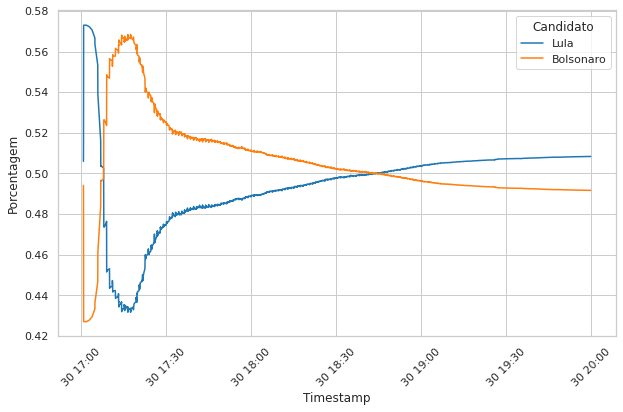

In [16]:
plt.figure(figsize=(10, 6))
axes = sns.lineplot(data=aux_df, x="Timestamp", y="Porcentagem", hue="Candidato")
axes.tick_params(axis='x', rotation=45)